In [29]:
# Importación de bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [30]:
# Cargar los datos del CSV
train_df = pd.read_csv('data_csv/train_set.csv')
test_df = pd.read_csv('data_csv/test_set.csv')

In [31]:
# Función para cargar imágenes a partir de un DataFrame
def load_images(dataframe, base_path):
    images = []
    labels = []
    for index, row in dataframe.iterrows():
        img_path = os.path.join(base_path, row['path'])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (48, 48))
        images.append(img)
        labels.append(row['label'])
    return np.array(images), np.array(labels)

In [32]:
# Definir las rutas base para entrenamiento y prueba
TRAIN_BASE_PATH = 'train'
TEST_BASE_PATH = 'data/images/test'

In [33]:
# Cargar imágenes de entrenamiento
X, y = load_images(train_df, TRAIN_BASE_PATH)

In [34]:
# En test_df solo tenemos ids, así que no cargaremos imágenes aquí
test_image_ids = test_df['id_img'].values

In [35]:
# Normalización de las imágenes
X = X / 255.0

In [36]:
# Redimensionar datos para cumplir con la entrada del modelo
X = X.reshape(-1, 48, 48, 1)

In [37]:
# Codificación de etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)

In [38]:
# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Creación del modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\rjulianortin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.2419 - loss: 1.8185 - val_accuracy: 0.3693 - val_loss: 1.6427
Epoch 2/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.3724 - loss: 1.6209 - val_accuracy: 0.4235 - val_loss: 1.5039
Epoch 3/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.4271 - loss: 1.4947 - val_accuracy: 0.4553 - val_loss: 1.4029
Epoch 4/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.4541 - loss: 1.4157 - val_accuracy: 0.4863 - val_loss: 1.3402
Epoch 5/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.4846 - loss: 1.3480 - val_accuracy: 0.5065 - val_loss: 1.2818
Epoch 6/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.5069 - loss: 1.2962 - val_accuracy: 0.5195 - val_loss: 1.2608
Epoch 7/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.5236 - loss: 1.2444 - val_accuracy: 0.5327 - val_loss: 1.2324
Epoch 8/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.5348 - loss: 1.2168 - 

In [45]:
# Evaluación del modelo en el conjunto de validación
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Precisión en el conjunto de validación: {val_acc:.2f}')

181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5866 - loss: 1.1294
Precisión en el conjunto de validación: 0.58


In [42]:
# Cargar imágenes de prueba
def load_test_images(ids, base_path):
    images = []
    for img_id in ids:
        img_path = os.path.join(base_path, f'{img_id}.jpg')
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error al leer la imagen en: {img_path}")
            continue
        img = cv2.resize(img, (48, 48))
        img = img / 255.0
        img = img.reshape(48, 48, 1)
        images.append(img)
    return np.array(images)

In [43]:
# Cargar todas las imágenes de prueba
X_test = load_test_images(test_df['id_img'].values, TEST_BASE_PATH)

In [46]:
# Predicción en el conjunto de prueba (utilizando los ids de las imágenes de test)
predictions = []
for img_id in test_image_ids:
    img_path = os.path.join(TEST_BASE_PATH, f'{img_id}.jpg')
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48, 48))
    img = img / 255.0
    img = img.reshape(1, 48, 48, 1)
    pred = model.predict(img)
    pred_label = label_encoder.inverse_transform([np.argmax(pred)])[0]
    predictions.append(pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [47]:
# Guardar las predicciones en un CSV
submission_df = pd.DataFrame({'id_img': test_image_ids, 'label': predictions})
submission_df.to_csv('submission_memoria2_v2.csv', index=False)

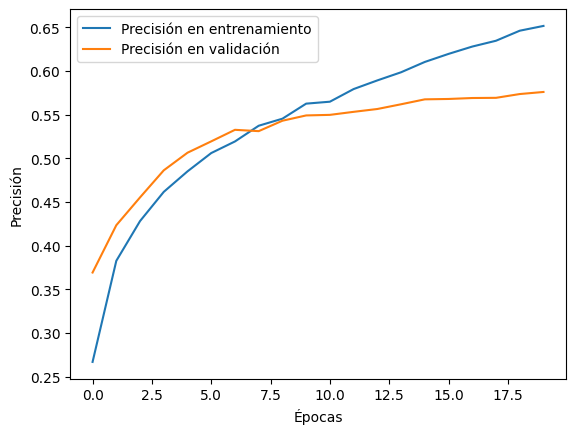

In [48]:
# Visualización de resultados de entrenamiento
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()
